In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("Pleiades_cluster.csv")
df.head()

,gmag,ra,dec,plx,bp_rp,lum_val,teff_val,radius_val
0,15.684173,58.452096,23.485778,3.486630,2.192428,0.062333,3797.0000,0.576938
1,7.498167,55.930096,25.080502,8.027063,0.188913,NaN,8337.3330,NaN
2,16.102013,57.170842,23.237979,8.509836,3.116683,NaN,3838.1667,NaN
3,12.923352,56.999005,24.731093,6.493298,1.591153,0.156267,4456.1650,0.663230
4,16.454210,55.865759,24.270604,2.675075,2.346289,0.050944,3830.0100,0.512623


In [2]:
mag=df['gmag']+5-5*np.log10(1000/df['plx'])
print(mag)

0       8.396202
1       2.020950
2      10.751619
3       6.985679
4       8.590890
         ...    
982     5.662324
983     2.481108
984     7.098074
985     8.612791
986     5.020737
Length: 987, dtype: float64


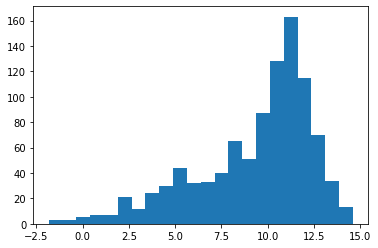

In [3]:
import matplotlib.pyplot as plt 
plt.hist(mag,bins='auto')
plt.show()

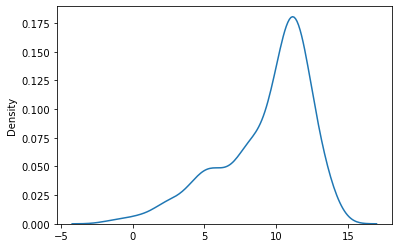

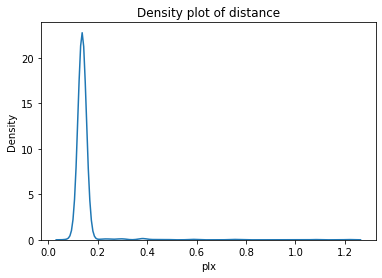

In [4]:
import seaborn as sns
sns.kdeplot(mag)
plt.show()
sns.kdeplot(1/df['plx'])
plt.title("Density plot of distance")
plt.show()

In [5]:
new_df=df.where((1/df['plx'])<0.3)
mean_dist=np.mean(1/new_df['plx'])
print("Mean distance of the cluster is", mean_dist*1000,"parsec")
# wrong=1/np.mean(new_df['plx'])
# print(wrong)

Mean distance of the cluster is 137.22025496785452 parsec


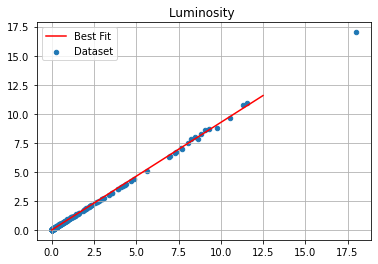

m= 0.924139346087032 ,c= 0.021458662832756215


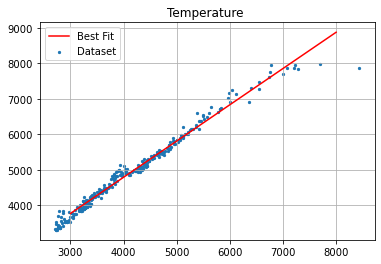

m= 1.0224066593943668 ,c= 699.9724891568306


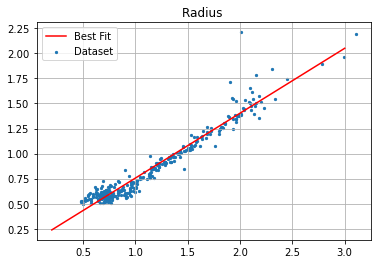

m= 0.6473555770041322 ,c= 0.10854168396770336


In [6]:
new_df=df.dropna()
mag_new=new_df['gmag']+5-5*np.log10(1000/new_df['plx'])
lum=10**((4.77-mag_new)/2.5)
temp=5601*((new_df['bp_rp']+0.4)**(-2/3))
radius=(lum**0.5)/(temp*temp/(5800*5800))
from scipy.optimize import curve_fit as cf
def f(x,m,c):
    return m*x+c
plt.scatter(lum,(new_df['lum_val']),s=20,label='Dataset')
plt.title("Luminosity ")
plt.grid()
x = np.linspace(0,12.5,100)
p_opt, p_cov = cf(f,lum,(new_df['lum_val']))
plt.plot(x,f(x,*p_opt),c='r',label='Best Fit')
plt.legend()
plt.show()
print("m=",p_opt[0],",c=",p_opt[1])
plt.scatter(temp,new_df['teff_val'],s=5,label='Dataset')
plt.title("Temperature ")
plt.grid()
x = np.linspace(3000,8000,100)
p_opt, p_cov = cf(f,temp,new_df['teff_val'])
plt.plot(x,f(x,*p_opt),c='r',label='Best Fit')
plt.legend()
plt.show()
print("m=",p_opt[0],",c=",p_opt[1])
plt.scatter(radius,new_df['radius_val'],s=5,label='Dataset')
plt.title("Radius ")
plt.grid()
x = np.linspace(0.2,3,100)
p_opt, p_cov = cf(f,radius,new_df['radius_val'])
plt.plot(x,f(x,*p_opt),c='r',label='Best Fit')
plt.legend()
plt.show()
print("m=",p_opt[0],",c=",p_opt[1])
# print(new_df)
# print(lum)
# print(temp)
# print(radius)

<ipython-input-7-3384dd099ebf>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


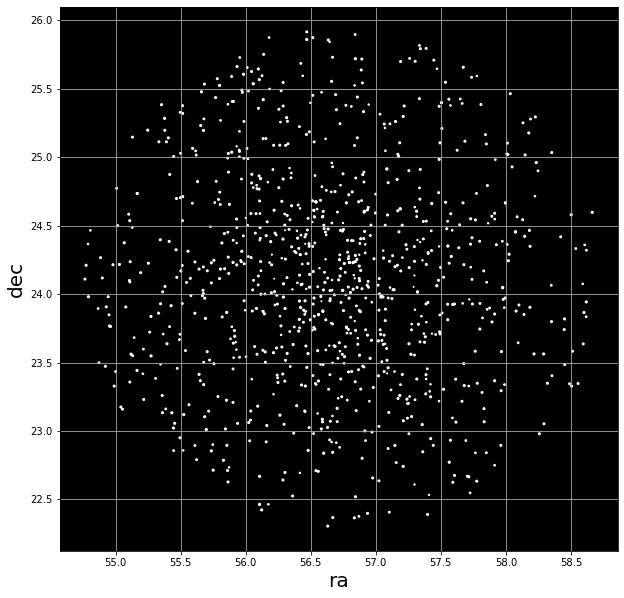

In [7]:
max_gmag=np.max(df['gmag'])
plt.figure(figsize=(10,10))
plt.scatter(df['ra'],df['dec'],s=5*(df['gmag']/max_gmag),c='w')
plt.grid()
ax = plt.axes()
ax.set_facecolor("black")
plt.xlabel("ra",fontsize=20)
plt.ylabel("dec",fontsize=20)
plt.show()

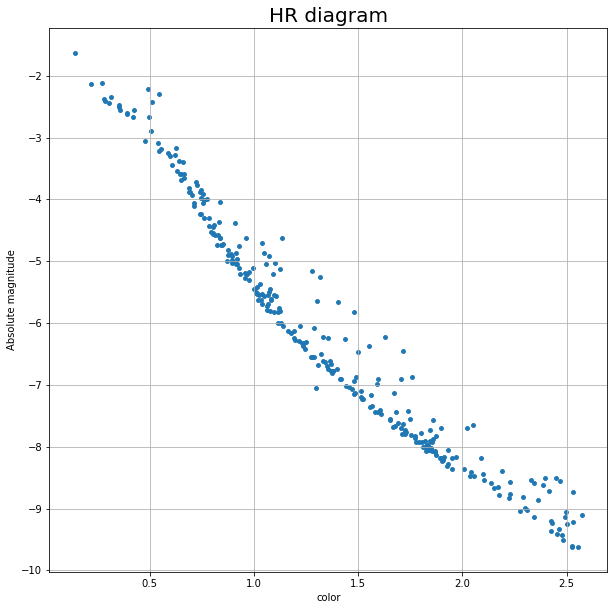

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(new_df['bp_rp'],-mag_new,s=15,label="HR diagram")
plt.grid()
plt.ylabel("Absolute magnitude")
plt.xlabel("color")
plt.title("HR diagram",fontsize=20)
plt.show()